## Quantal Response Equilibrium
#### Example: Entry/Exit Game
Consider the following Entry/Exit game: 


|      |       | Firm 2|      |
|------| ----- |:-----:| :-----:|
|      |       | Entry (E) | Exit (N)  |
|Firm 1| Entry (E) | -3, -3| 5, 0   |
|      | Exit (N)  | 0, 5  | 0, 0   |

#### Quantal Response Function
Now, we consider quantal response of Firm i to Firm -i's strategy: $QR_{i}\left(\sigma_{-i}\right)\left(s_{i}\right)=\frac{\exp\left(u_{i}\left(s_{i},\,\sigma_{-i}\right)/\mu\right)}{\sum_{s_{i}^{\prime}}\exp\left(u_{i}\left(s_{i}^{\prime},\,\sigma_{-i}\right)/\mu\right)}$.
By letting $\sigma_i=p_iE+(1-p_i)N$, it is rewritten as
$p_{i}(p_{-i})=\frac{\exp\left(u_{i}\left(E,\,p_{-i}\right)/\mu\right)}{\exp\left(u_{i}\left(E,\,p_{-i}\right)/\mu\right)+\exp\left(u_{i}\left(N,\,p_{-i}\right)/\mu\right)}$, which is calculated by the following code. 



In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
u_EE = -3
u_EN = 5
u_NE = 0
u_NN = 0

def u_Esigmaj(pj):
    return u_EE*pj + u_EN*(1-pj)

def u_Nsigmaj(pj):
    return u_NE*pj + u_NN*(1-pj)

def QR(pj, mu):
    return np.exp(u_Esigmaj(pj)/mu)/(np.exp(u_Esigmaj(pj)/mu) + np.exp(u_Nsigmaj(pj)/mu))

You can see how this function varies depending on the level of $\mu$. (You can see that $p_i \rightarrow \frac{1}{2}$ as $\mu \rightarrow \infty$, and $p_i \rightarrow BR_i(p_{-i})$ as $\mu \rightarrow 0$)

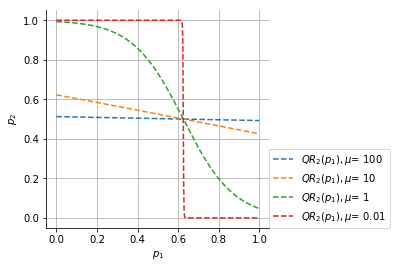

In [59]:
pjs = np.arange(0, 1, 0.001)
fig = plt.figure(figsize = (4,4))
for mu, col in zip([100, 10, 1, 0.01], ['C0', 'C1', 'C2', 'C3']):
    plt.plot(pjs, QR(pjs, mu), label = '$QR_2(p_1), \mu $= {}'.format(mu), linestyle = 'dashed', color = col)
plt.xlabel('$p_1$')
plt.ylabel('$p_2$')
plt.legend(loc=(1,0))
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#### Quantal Response Equilibrium
Finally, we can depict QRE as intersections of quantal resopnses in the following graphs.
In general, QRE does not coinside with NE of the original game. Furthermore, it varies depending on the level of $\mu$.  

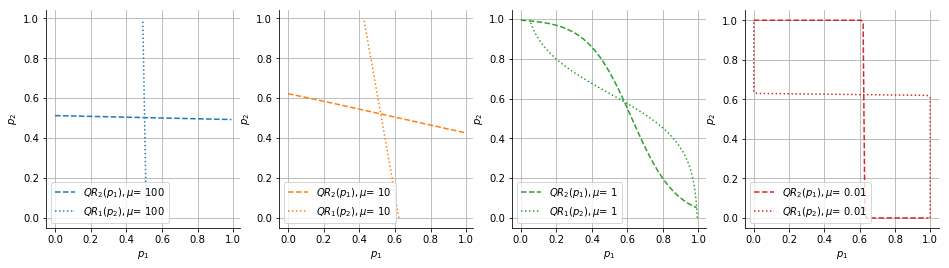

In [58]:
pjs = np.arange(0, 1, 0.01)

fig, axes = plt.subplots(1,4, figsize = (16,4))
#axes[0,1].plot(pjs, QR(pjs, 1), label = '$QR_2(p_1), \mu $= {}'.format(1), linestyle = 'dashed', color = 'C0')
for ax, mu, col in zip(axes, [100, 10, 1, 0.01], ['C0', 'C1', 'C2', 'C3']):
    ax.plot(pjs, QR(pjs, mu), label = '$QR_2(p_1), \mu $= {}'.format(mu), linestyle = 'dashed', color = col)
    ax.plot(QR(pjs, mu), pjs, label = '$QR_1(p_2), \mu $= {}'.format(mu), linestyle = 'dotted', color = col)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc='lower left')
    ax.grid(True)
    ax.set_xlabel('$p_1$')
    ax.set_ylabel('$p_2$')
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)